# AML

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive')

In [3]:
# Import library modules
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from google.colab.patches import cv2_imshow 

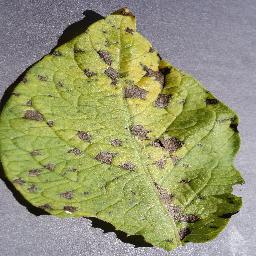

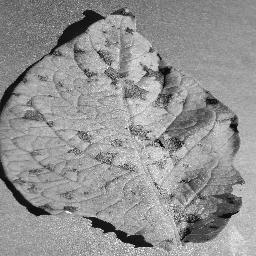

In [30]:
img_color = cv2.imread("Comp Vision/a1.jpeg", cv2.IMREAD_COLOR)
cv2_imshow(img_color)


print ('\n')
img_grayscale = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_grayscale)




In [31]:
img_shape = img_color.shape
img_shape

(256, 256, 3)

In [93]:
avg_row = np.average(img_color, axis=0)
mean = np.average(avg_row, axis=0)
print("\n Mean of RGB :" + str(mean))



 Mean of RGB :[111.25582886 151.44514465 149.25415039]


In [47]:
__, standDiv = cv2.meanStdDev(img_color)

print("\n SD of RGB:" + str(standDiv))

In [94]:
## before using this we need to make the backgroung white by segmentation 
gray_img=cv2.bitwise_not(img_grayscale)

points = np.column_stack(np.where(gray_img > 0))

angle=cv2.minAreaRect(points)[-1]
if angle<-45:
    angle=-(90+angle)
else:
    angle=-angle
print("\n Angle of rotation: " + str(angle))


 Angle of rotation:-0.0


In [96]:
margDist = np.histogramdd(np.ravel(gray_img), bins = 256)[0]/gray_img.size
margDist = list(filter(lambda p: p > 0, np.ravel(margDist)))
entropyGray = -np.sum(np.multiply(margDist, np.log2(margDist)))

print("\n Entropy: " + str(entropyGray))


 Entropy: 7.167699317207809


In [97]:
histogram, bin_edges = np.histogram(gray_img, bins=256, range=(0, 256),density=True)

sumOfHist=0

for i in histogram:
    sumOfHist+=i*i;

energy = np.sqrt(sumOfHist)
print("\n Energy: "+ str(energy))

'''
print(histogram)

plt.figure()
plt.xlim([0.0, 256])
plt.plot(bin_edges[0:-1], histogram)
plt.show()
'''



 Energy: 0.09355470312910806


'\nprint(histogram)\n\nplt.figure()\nplt.xlim([0.0, 256])\nplt.plot(bin_edges[0:-1], histogram)\nplt.show()\n'

In [98]:
# most of the sources talk about SD of a gray image for contrast 

contrast = img_grayscale.std()
print("\n Contrast: "+ str(contrast))


 Contrast: 39.588485140226666


In [99]:
from skimage import feature

# the value of second paramater of greycomatrix can be changed its the distance between the pixcals

g = feature.greycomatrix(img_grayscale, [5], [0, np.pi/2], levels=256,normed=True, symmetric=True)
#{‘contrast’, ‘dissimilarity’, ‘homogeneity’, ‘energy’, ‘correlation’, ‘ASM’}, optional
contrast = skimage.feature.texture.greycoprops(g,prop='contrast')[0,0]
dissimilarity = skimage.feature.texture.greycoprops(g,prop='dissimilarity')[0,0]
homogeneity = skimage.feature.texture.greycoprops(g,prop='homogeneity')[0,0]
energy = skimage.feature.texture.greycoprops(g,prop='energy')[0,0]
correlation = skimage.feature.texture.greycoprops(g,prop='correlation')[0,0]
ASM = skimage.feature.texture.greycoprops(g,prop='ASM')[0,0]

print("\n contrast :" + str(contrast))
print("\n dissimilarity :" + str(dissimilarity))
print("\n homogeneity :" + str(homogeneity))
print("\n energy :" + str(energy))
print("\n correlation:" + str(correlation))
print("\n ASM:" + str(ASM))



 contrast :1470.719123505979

 dissimilarity :25.821433017928342

 homogeneity :0.05892970578453073

 energy :0.011077562117363347

 correlation:0.5311939031411443

 ASM:0.0001227123824640435
